## RITA Flight Data Exploration

## About this dataset
### This dataset contains a list of 583,985 flights that departed and arrived in the month of January, 2019 with many variables of interest like - departure time, arrival time, flight operator, delay reasons/times (NAS, security, carrier, etc.) and many more.

## Data Wrangling & Exploration

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
flight_info = pd.read_csv('flights.csv')
flight_info.columns = map(str.lower, flight_info.columns)
flight_info.drop(columns=['unnamed: 35'],inplace=True)
flight_info.shape

(583985, 35)

In [5]:
flight_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 35 columns):
year                   583985 non-null int64
quarter                583985 non-null int64
month                  583985 non-null int64
day_of_month           583985 non-null int64
day_of_week            583985 non-null int64
op_unique_carrier      583985 non-null object
tail_num               581442 non-null object
op_carrier_fl_num      583985 non-null int64
origin                 583985 non-null object
origin_city_name       583985 non-null object
origin_state_abr       583985 non-null object
dest                   583985 non-null object
dest_city_name         583985 non-null object
dest_state_abr         583985 non-null object
crs_dep_time           583985 non-null int64
dep_time               567633 non-null float64
dep_delay              567630 non-null float64
taxi_out               567369 non-null float64
taxi_in                566924 non-null float64
crs_arr_time      

In [6]:
flight_info.describe()

,year,quarter,month,day_of_month,day_of_week,op_carrier_fl_num,crs_dep_time,dep_time,dep_delay,taxi_out,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,583985.0,583985.0,583985.0,583985.000000,583985.000000,583985.000000,583985.000000,567633.000000,567630.000000,567369.000000,...,583851.000000,565963.000000,565963.000000,583985.0,583985.000000,105222.000000,105222.000000,105222.000000,105222.000000,105222.000000
mean,2019.0,1.0,1.0,15.960088,3.835626,2537.869334,1326.266642,1331.957814,9.766091,18.331121,...,143.557401,138.610077,112.694461,1.0,797.742767,20.106080,4.428551,18.508392,0.079508,24.950590
std,0.0,0.0,0.0,8.987942,1.921899,1821.736145,484.081000,495.404020,48.626941,10.895553,...,73.216303,73.078565,71.195757,0.0,589.999261,65.762202,38.535323,41.726392,3.203342,50.851973
min,2019.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,-47.000000,1.000000,...,20.000000,16.000000,4.000000,1.0,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,1.0,1.0,8.000000,2.000000,979.000000,917.000000,921.000000,-6.000000,12.000000,...,90.000000,85.000000,61.000000,1.0,363.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.0,1.0,1.0,16.000000,4.000000,2114.000000,1320.000000,1328.000000,-3.000000,15.000000,...,125.000000,121.000000,94.000000,1.0,640.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2019.0,1.0,1.0,24.000000,5.000000,3902.000000,1730.000000,1738.000000,5.000000,21.000000,...,175.000000,170.000000,143.000000,1.0,1037.000000,16.000000,0.000000,21.000000,0.000000,29.000000
max,2019.0,1.0,1.0,31.000000,7.000000,7439.000000,2359.000000,2400.000000,1651.000000,181.000000,...,703.000000,737.000000,691.000000,1.0,4983.000000,1638.000000,1416.000000,1447.000000,816.000000,1514.000000


In [7]:
flight_info.head()

,year,quarter,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin,origin_city_name,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,1,1,6,7,9E,N8694A,3280,ATL,"Atlanta, GA",...,47.0,37.0,18.0,1.0,83.0,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,7,1,9E,N8970D,3280,ATL,"Atlanta, GA",...,47.0,32.0,19.0,1.0,83.0,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,8,2,9E,N820AY,3280,ATL,"Atlanta, GA",...,47.0,39.0,19.0,1.0,83.0,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,9,3,9E,N840AY,3280,ATL,"Atlanta, GA",...,47.0,37.0,19.0,1.0,83.0,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,10,4,9E,N8969A,3280,ATL,"Atlanta, GA",...,47.0,41.0,21.0,1.0,83.0,NaN,NaN,NaN,NaN,NaN


In [8]:
#since all records are from January of 2019, dropping year, qtr and months columns
flight_info.drop(columns=['year', 'quarter', 'month'], inplace=True)

## 1. What is the distribution of departure & arrival delays?

### Most of the departure delays are spread across 0 and 50 mins, with the graph skewed to the right.

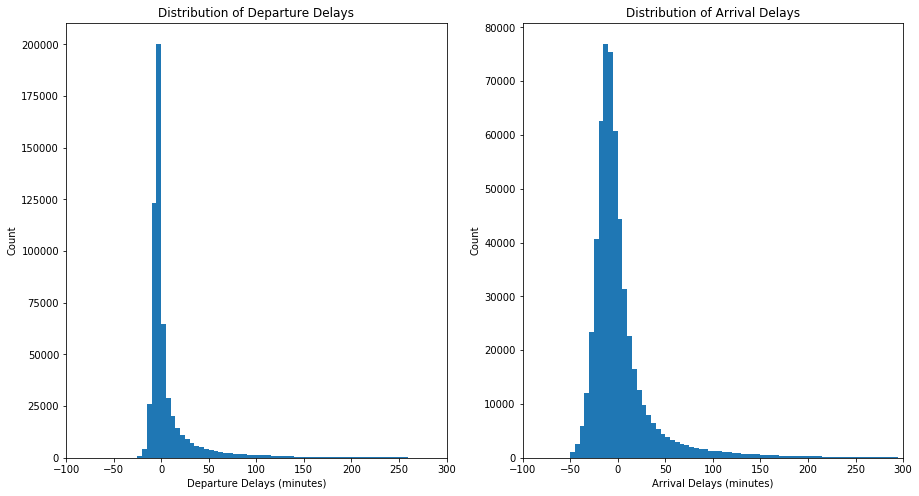

In [9]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
bin_edges=np.arange(-50,300,5)
plt.hist(flight_info.arr_delay, bins=bin_edges)
plt.xlim(-100,300)
plt.xlabel('Arrival Delays (minutes)')
plt.ylabel('Count'),
plt.title('Distribution of Arrival Delays')
plt.subplot(1,2,1)
bin_edges=np.arange(-50,300,5)
plt.hist(flight_info.dep_delay, bins=bin_edges)
plt.xlim(-100,300)
plt.xlabel('Departure Delays (minutes)')
plt.ylabel('Count'),
plt.title('Distribution of Departure Delays');

## 2. What are the average departure and arrival delays for busiest airports in the dataset?

### Chicago has the highest average departure and arrival delay time.
### Even though Phoenix, Philadelphia, and Minneapolis have high average departure delays, they rarely face any average arrival delays.  

In [10]:
#subset busiest airports from flight_info dataframe
busiest_origin_airports = set(flight_info.origin.value_counts().index[:25])
busiest_destination_airports = set(flight_info.dest.value_counts().index[:25])
busiest_airports = busiest_origin_airports.intersection(busiest_destination_airports)

<Figure size 1080x576 with 0 Axes>

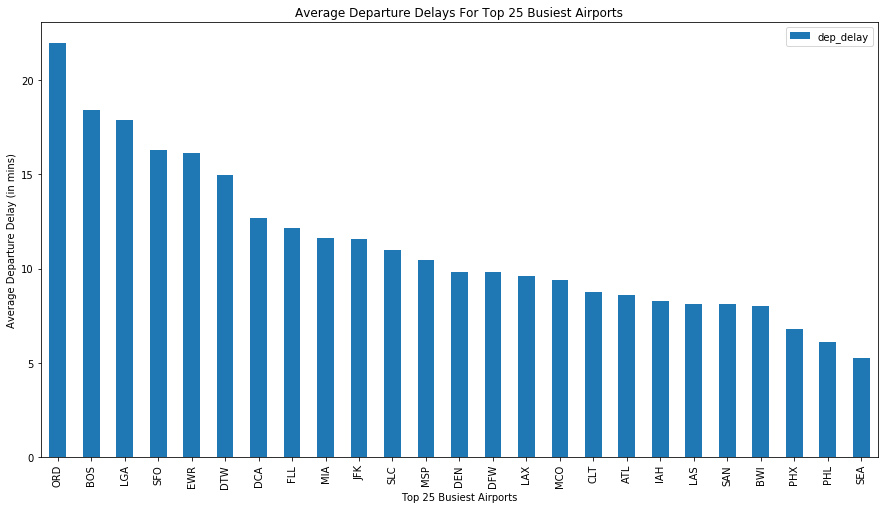

In [11]:
df = flight_info[flight_info.origin.isin(busiest_airports)]
df = df[df.dest.isin(busiest_airports)]
plt.figure(figsize=(15,8))
df.groupby('origin').agg({'dep_delay':'mean'}).sort_values('dep_delay', ascending=False).plot.bar(figsize=(15,8))
plt.ylabel('Average Departure Delay (in mins)')
plt.xlabel('Top 25 Busiest Airports')
plt.title('Average Departure Delays For Top 25 Busiest Airports');

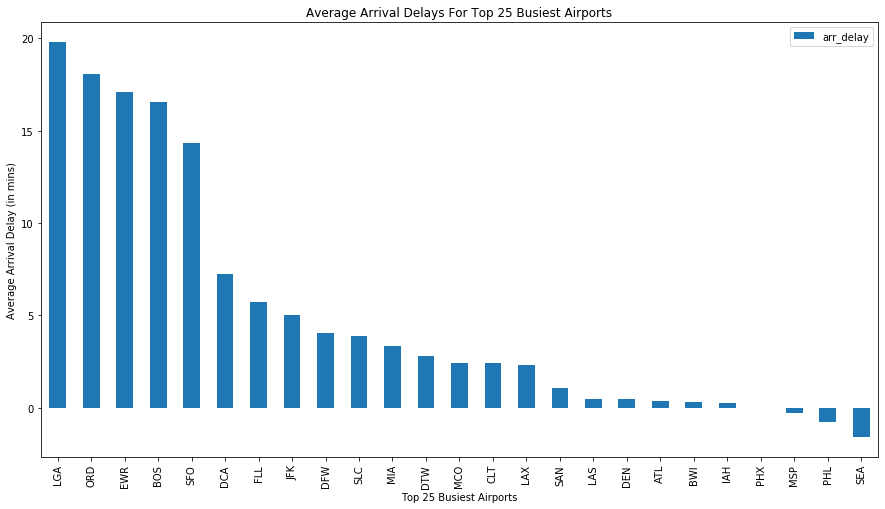

In [12]:
df.groupby('dest').agg({'arr_delay':'mean'}).sort_values('arr_delay', ascending=False).plot.bar(figsize=(15,8))
plt.ylabel('Average Arrival Delay (in mins)')
plt.xlabel('Top 25 Busiest Airports')
plt.title('Average Arrival Delays For Top 25 Busiest Airports');

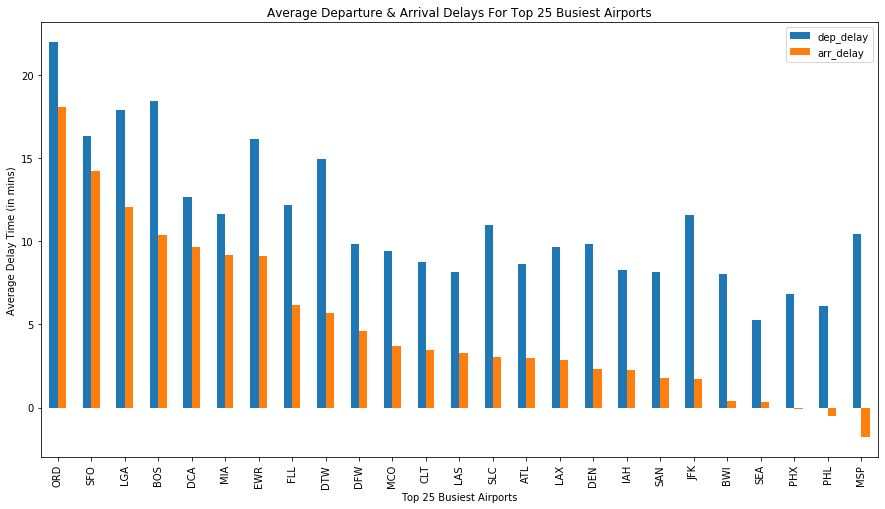

In [13]:
df.groupby(['origin']).agg({'dep_delay':'mean', 'arr_delay':'mean'}).sort_values('arr_delay', ascending=False).plot.bar(figsize=(15,8))
plt.ylabel('Average Delay Time (in mins)')
plt.xlabel('Top 25 Busiest Airports')
plt.title('Average Departure & Arrival Delays For Top 25 Busiest Airports');

## 3. What is the best time to book a flight?

### Best time to travel (without any delays) is between 4AM and 9AM. After that, departure and arrival delays increases as the day passes by.

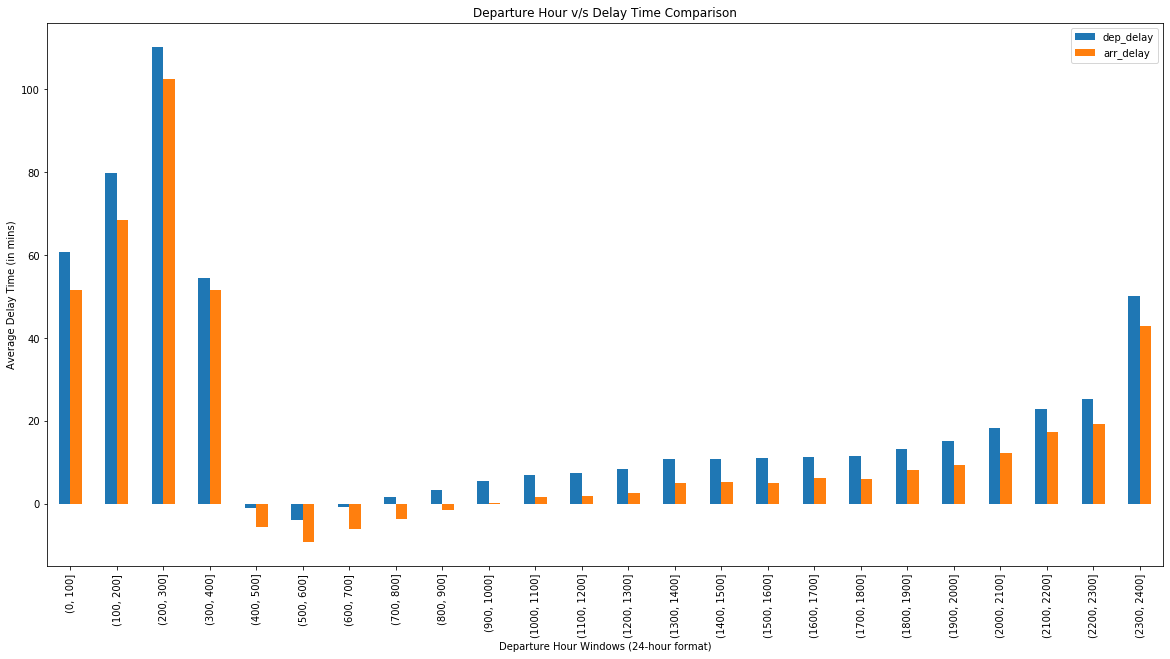

In [14]:
#extract departure hour value from departure time field and create windows
flight_info['dep_hour']=pd.cut(flight_info.dep_time, list(range(0, 2500, 100)))
flight_info.drop(index=flight_info[flight_info.dep_hour.isna()==True].index, inplace=True)

flight_info.groupby('dep_hour').agg({'dep_delay':'mean', 'arr_delay':'mean'}).plot.bar(figsize=(20,10))

plt.xlabel('Departure Hour Windows (24-hour format)')
plt.ylabel('Average Delay Time (in mins)')
plt.title('Departure Hour v/s Delay Time Comparison')

plt.show()

## 4. What day of the month / week has maximum delays?

### We observe that the maximum number of delays occured on the 24th January, 2019. However, the observed pattern for delays is in the middle of the week (or on the 4th day of each wee) in January.

In [15]:
delayed_indicator = []
for index, row in flight_info.iterrows():
    if (row.arr_delay > 0):
        delayed_indicator.append(True)
    else:
        delayed_indicator.append(False)
flight_info['delayed_indicator'] = delayed_indicator

flights_delayed = flight_info[flight_info.delayed_indicator==True]

#delete all nan records
flights_delayed.dropna(inplace=True, how='any', subset=['carrier_delay', 'security_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay'])
flights_delayed.reset_index(inplace=True)
flights_delayed.drop(columns=['index'], inplace=True)

flights_delayed.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(105222, 34)

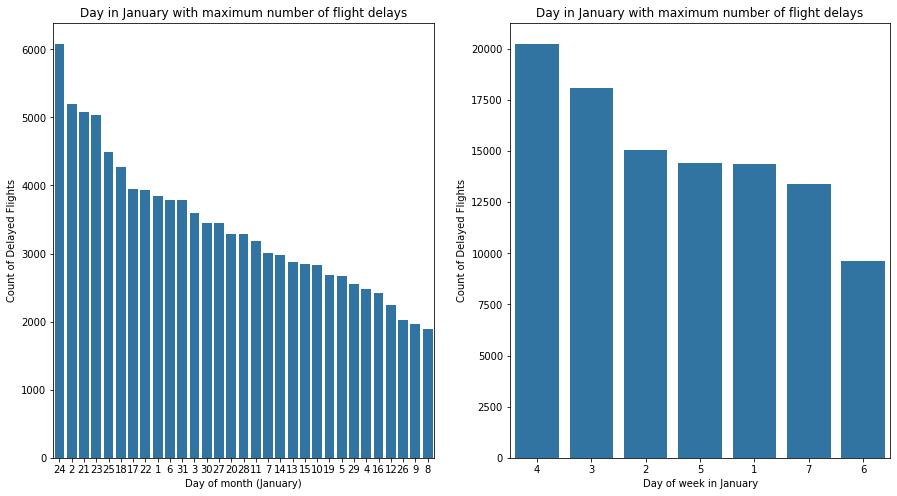

In [16]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
order = flights_delayed.day_of_month.value_counts().index
sb.countplot(data = flights_delayed, x='day_of_month', order = order, color = sb.color_palette()[0])
plt.xlabel('Day of month (January)')
plt.ylabel('Count of Delayed Flights')
plt.title('Day in January with maximum number of flight delays')

plt.subplot(1,2,2)
order = flights_delayed.day_of_week.value_counts().index
sb.countplot(data = flights_delayed, x='day_of_week', order = order, color = sb.color_palette()[0])
plt.xlabel('Day of week in January')
plt.ylabel('Count of Delayed Flights')
plt.title('Day in January with maximum number of flight delays');

## 5. Considering that a flight is delayed when the arrival time is greater than the scheduled arrival time, what carrier operators have the maximum flights delayed?

### Flight operators listed below have the maximum flights delayed in January, 2019. 
#### WN - Southwest Airlines
#### OO - SkyWest Airlines
#### AA - American Airlines
#### DL - Delta Airlines
#### UA - United Airlines

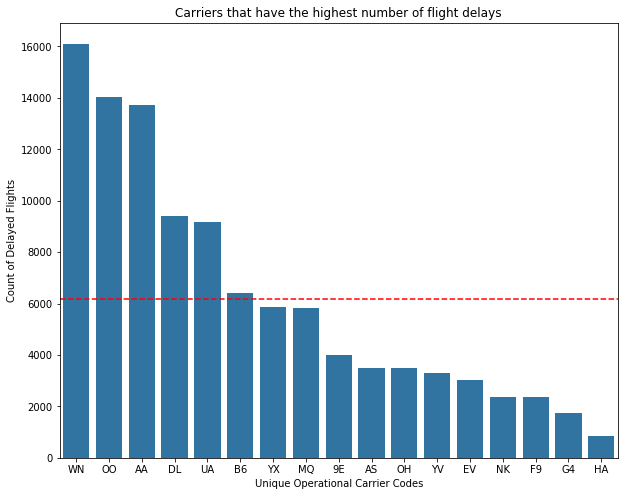

In [17]:
order = flights_delayed.op_unique_carrier.value_counts().index
plt.figure(figsize=(10,8))
sb.countplot(data = flights_delayed, x='op_unique_carrier', order = order, color = sb.color_palette()[0])
plt.xlabel('Unique Operational Carrier Codes')
plt.ylabel('Count of Delayed Flights')
plt.title('Carriers that have the highest number of flight delays')
average_val = round(flights_delayed.count()[0]/flights_delayed.op_unique_carrier.nunique())
plt.axhline(average_val, ls = '--', color="r");

## 6. Of all delayed flights for the above mentioned operators, what is the most reported reason for the delay?

### For all these operators, B6 (or JetBlue) has the highest average time of departure and arrival delays, which can be attributed to the carrier operations. 
### That said, although DL (or Delta) and WN (or Southwest) have high average delay times, they rarely have any  average arrival delays.  
### UA (or United Airlines) is the most affected by National Air System performance which is the major reason for its flight delays.

In [18]:
#getting data only for flight carriers that have higher than average delays
carriers_above_average_delay = list(flights_delayed.groupby('op_unique_carrier').op_unique_carrier.count()[flights_delayed.groupby('op_unique_carrier').op_unique_carrier.count() > average_val].index)
flights_delayed_subset = flight_info[flight_info['op_unique_carrier'].isin(carriers_above_average_delay)]
flights_delayed_subset.reset_index(inplace=True)
flights_delayed_subset.drop(columns=['index'], inplace=True)
flights_delayed_subset.shape

(388355, 34)

Text(0.5, 1.0, 'Delay Reason For Operators With Maximum Delays')

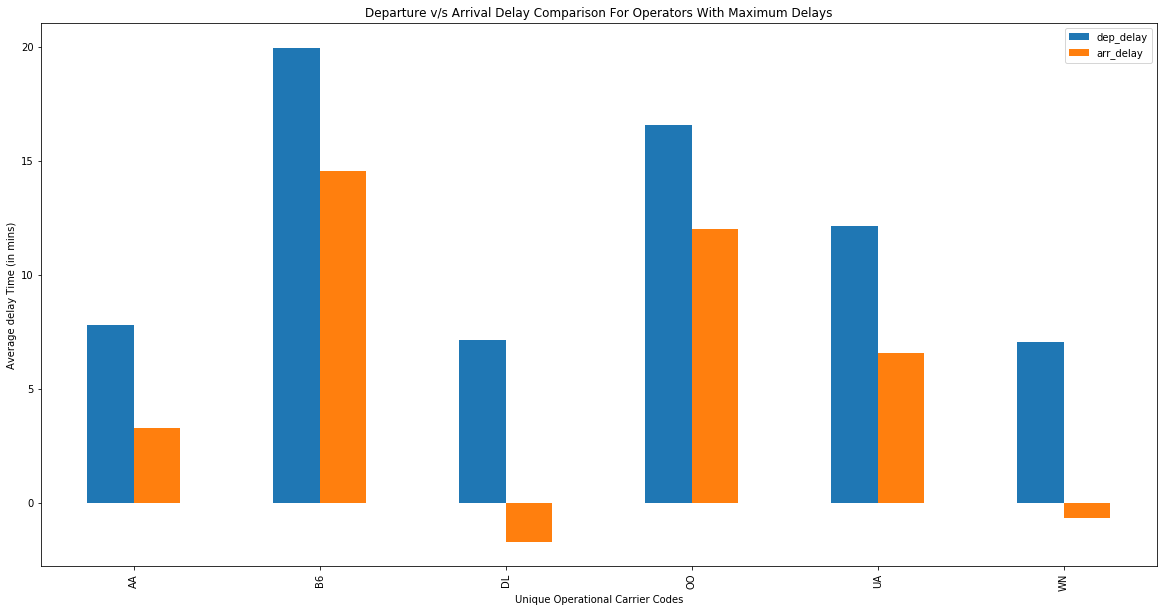

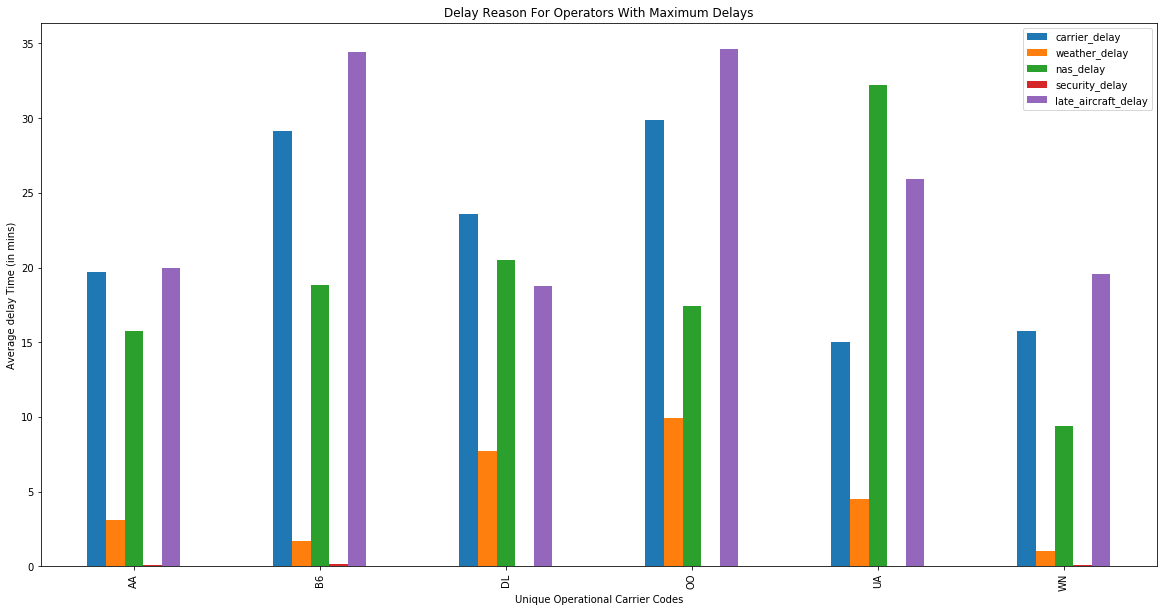

In [19]:
flights_delayed_subset.groupby('op_unique_carrier').agg({'dep_delay':'mean', 'arr_delay':'mean'}).sort_values('op_unique_carrier').plot.bar(figsize=(20,10))
plt.xlabel('Unique Operational Carrier Codes')
plt.ylabel('Average delay Time (in mins)')
plt.title('Departure v/s Arrival Delay Comparison For Operators With Maximum Delays')
flights_delayed_subset.groupby('op_unique_carrier').agg({'carrier_delay':'mean', 'weather_delay':'mean' , 'nas_delay':'mean', 'security_delay':'mean', 'late_aircraft_delay':'mean'}).sort_values('op_unique_carrier').plot.bar(figsize=(20,10))
plt.xlabel('Unique Operational Carrier Codes')
plt.ylabel('Average delay Time (in mins)')
plt.title('Delay Reason For Operators With Maximum Delays')

## 7. What is the relationship between departure and arrival delays?

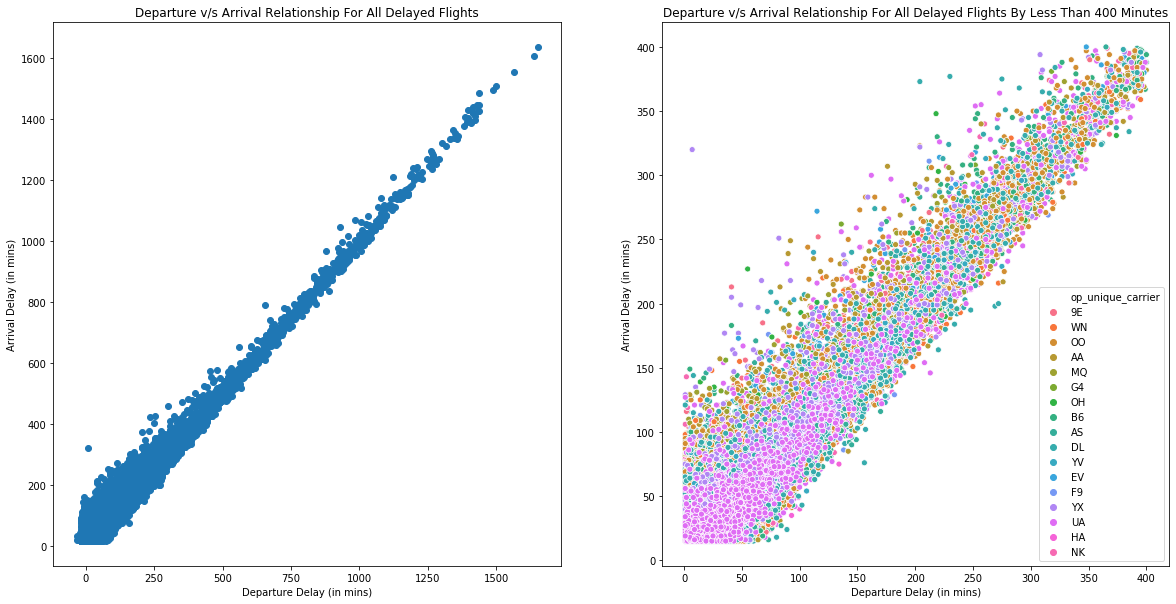

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(x=flights_delayed.dep_delay, y=flights_delayed.arr_delay)
plt.xlabel('Departure Delay (in mins)')
plt.ylabel('Arrival Delay (in mins)')
plt.title('Departure v/s Arrival Relationship For All Delayed Flights')
flights_delayed_subset_filtered = flights_delayed.query('dep_delay > 0 and arr_delay > 0 and dep_delay <= 400 and arr_delay <= 400')
plt.subplot(1,2,2)
sb.scatterplot(x=flights_delayed_subset_filtered.dep_delay, y=flights_delayed_subset_filtered.arr_delay, hue=flights_delayed_subset_filtered.op_unique_carrier)
plt.xlabel('Departure Delay (in mins)')
plt.ylabel('Arrival Delay (in mins)')
plt.title('Departure v/s Arrival Relationship For All Delayed Flights By Less Than 400 Minutes')
plt.show()

## There seems to be a linear relationship between departure and arrival delay times (as per the plot on the left). 
## Using color, however, to identify this relationship broken down by each carrier, in plot 2, is not providing much value. 

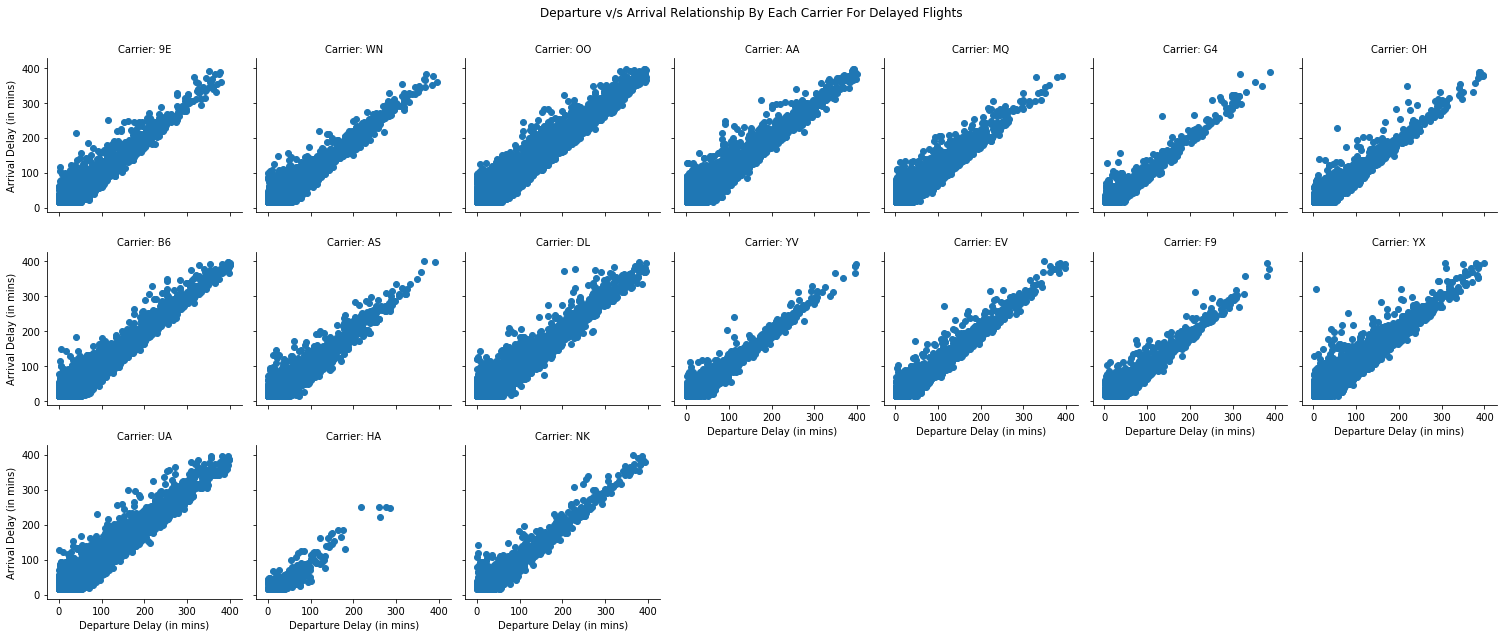

In [21]:
g = sb.FacetGrid(data = flights_delayed_subset_filtered, col = 'op_unique_carrier', col_wrap=7)
g = (g.map(plt.scatter, 'dep_delay', 'arr_delay').set_titles("Carrier: {col_name}"))
g.set_xlabels("Departure Delay (in mins)")
g.set_ylabels("Arrival Delay (in mins)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Departure v/s Arrival Relationship By Each Carrier For Delayed Flights');

## By using grids, it is clear that all the carriers which have delayed flights in January, 2019 follow a linear relationship between departure and arrival delays. In other words, each delayed departed flight will highly likely be delayed on arrival as well. 

## 8. Which day of the week do we observe high average delays?
### The first day of the week (Monday) has the highest average departure and arrival delays, majority of which can reasoned in terms of higher average late aircraft delays and delays caused by National Air System.

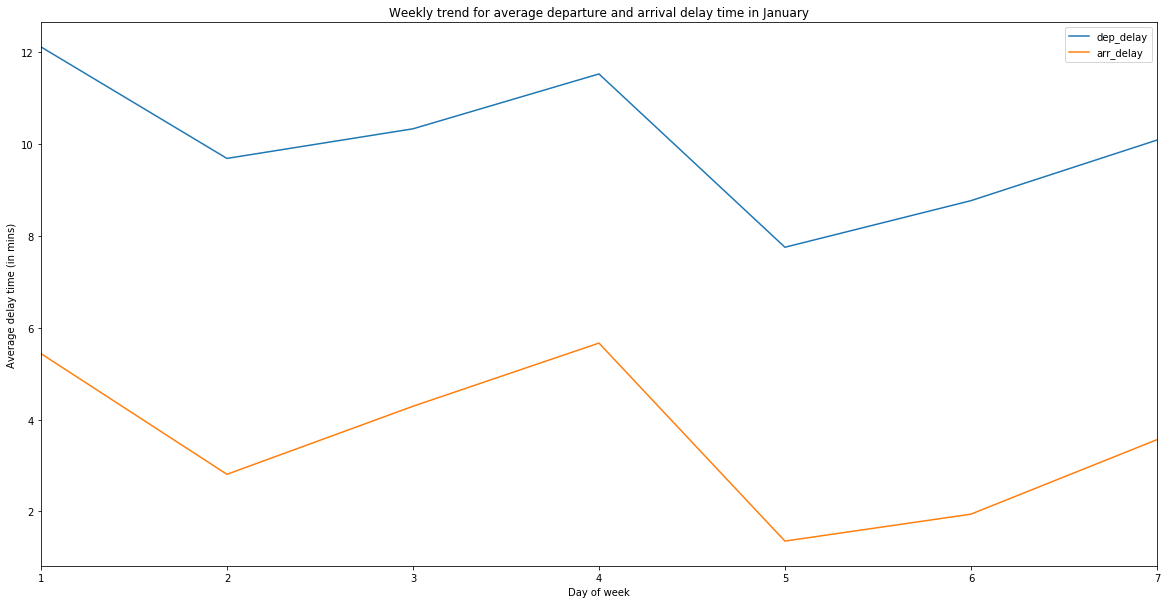

In [24]:
flights_delayed_subset.groupby('day_of_week').agg({'dep_delay':'mean', 'arr_delay':'mean'}).sort_values('day_of_week').plot.line(figsize=(20,10))
plt.xlabel('Day of week')
plt.ylabel('Average delay time (in mins)')
plt.title('Weekly trend for average departure and arrival delay time in January');

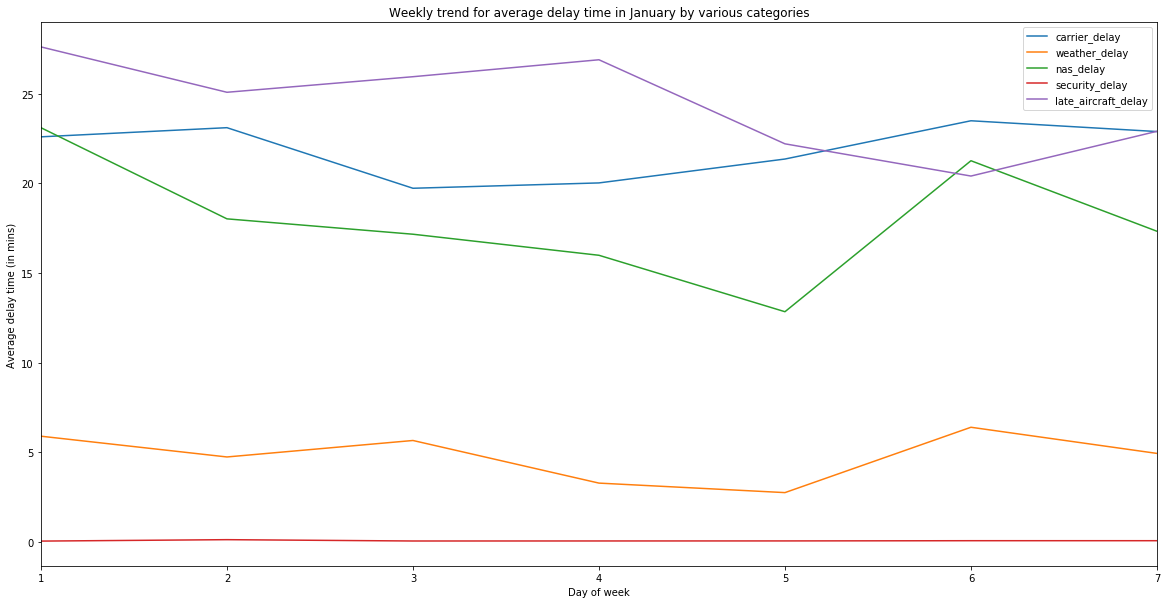

In [25]:
flights_delayed_subset.groupby('day_of_week').agg({'carrier_delay':'mean', 'weather_delay':'mean' , 'nas_delay':'mean', 'security_delay':'mean', 'late_aircraft_delay':'mean'}).sort_values('day_of_week').plot.line(figsize=(20,10))
plt.xlabel('Day of week')
plt.ylabel('Average delay time (in mins)')
plt.title('Weekly trend for average delay time in January by various categories');